In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')
# working in kaggle

kaggle_data_path = '../input'
local_data_path = 'data'

data_path = kaggle_data_path if os.path.exists(kaggle_data_path) else local_data_path

%ls $data_path

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: 92AF-A119

 Directorio de c:\projects\my\competitions\kaggle\house-prices-advanced-regression-techniques\data

30/06/2023  09:16    <DIR>          .
30/06/2023  09:16    <DIR>          ..
30/06/2023  09:16            13,893 data_description.txt
30/06/2023  14:01            35,898 elastic_submission.csv
30/06/2023  09:16            33,399 sample_submission.csv
30/06/2023  09:16           452,865 test.csv
30/06/2023  09:16           462,137 train.csv
30/06/2023  14:09            23,152 xgb_submission.csv
               6 archivos      1,021,344 bytes
               2 dirs  364,949,897,216 bytes libres


In [2]:
# check train data
data_train = pd.read_csv(f'{data_path}/train.csv')
data_test = pd.read_csv(f'{data_path}/test.csv')

print('train data shape: ', data_train.shape)
print('test data shape: ', data_test.shape)

train data shape:  (1460, 81)
test data shape:  (1459, 80)


In [3]:
# Target variable

y_data = data_train['SalePrice']
data_train.drop('SalePrice', axis=1, inplace=True)

In [4]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
# check missing data and percentage of total
data_train.isnull().sum().sort_values(ascending=False)[:10]/len(data_train)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
MasVnrType     0.597260
FireplaceQu    0.472603
LotFrontage    0.177397
GarageCond     0.055479
GarageType     0.055479
GarageYrBlt    0.055479
dtype: float64

In [6]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# check missing data
data_test.isnull().sum().sort_values(ascending=False)[:10]/len(data_test)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
MasVnrType      0.612748
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageQual      0.053461
GarageFinish    0.053461
dtype: float64

## Missing values

Both training and test data have 6 features with missing values more than 50% of the total number of rows. These features are: `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `MasVnrType`, and `FireplaceQu`.

In [8]:
# to be able to work with a single dataset
data = pd.concat([data_train, data_test], axis=0)
# remove missing data
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)
# id is index
data.set_index('Id', inplace=True)

In [9]:
# missing by type
data.isna().sum().groupby(data.dtypes).sum()

int64         0
float64     678
object     1051
dtype: int64

We have three types of features: `int64`, `float64`, and `object`. We will fill the missing values with the mean for `int64` and `float64` features, and with the mode for `object` features.

In [10]:
# check data float 
data_float = data.select_dtypes(include=['float64'])
data_float.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,,,,,
1,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
2,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
3,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
4,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
5,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0


In [11]:
# complete missing data with mean
fill_with_mean = data_float[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'GarageArea']].fillna(data_float.mean())
# check missing data with median
fill_with_median = data_float[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].fillna(data_float.median())
# update data
data_float.update(fill_with_mean)
data_float.update(fill_with_median)

In [12]:
# check float missing data
data.update(data_float)
data_float.isna().sum().sort_values(ascending=False)[:10]/len(data_float)

LotFrontage     0.0
MasVnrArea      0.0
BsmtFinSF1      0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
GarageYrBlt     0.0
GarageCars      0.0
dtype: float64

In [13]:
# check data object

data_object = data.select_dtypes(include=['object'])
data_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
# complete missing data with mode
data_object = data_object.fillna(data_object.mode().iloc[0])
# convert to category
data_cat = data_object.astype('category')
# updata data
data_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


# Categorical features

In [15]:
le = LabelEncoder()

data_encode = data_cat.apply(le.fit_transform)
data_encode.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
2,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
5,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [16]:
# update data
data[data_encode.columns] = data_encode
# object to cha
# check missing data
data.isna().sum().sort_values(ascending=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   int32  
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   int32  
 11  Condition1     2919 non-null   int32  
 12  Condition2     2919 non-null   int32  
 13  BldgType       2919 non-null   int32  
 14  HouseStyle     2919 non-null   int32  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   int32  
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   int32  
 5   LotShape       2919 non-null   int32  
 6   LandContour    2919 non-null   int32  
 7   Utilities      2919 non-null   int32  
 8   LotConfig      2919 non-null   int32  
 9   LandSlope      2919 non-null   int32  
 10  Neighborhood   2919 non-null   int32  
 11  Condition1     2919 non-null   int32  
 12  Condition2     2919 non-null   int32  
 13  BldgType       2919 non-null   int32  
 14  HouseStyle     2919 non-null   int32  
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemodAdd 

In [18]:
# data

data_train = data.loc[data_train['Id']]
data_test = data.loc[data_test['Id']]
X_test = data_test

In [19]:
X_train, X_cv, y_train, y_cv = train_test_split(data_train, y_data, test_size=0.2)
scores = pd.DataFrame(columns=['train', 'cv'])

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

scores.loc['lenealRegression'] = mean_squared_error(y_train, lr.predict(X_train), squared=False), mean_squared_error(y_cv, lr.predict(X_cv), squared=False)
scores.head()

,train,cv
lenealRegression,27193.712214,48948.87603


In [21]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

grid_params = {'alpha': alpha}

grid_search = GridSearchCV(Lasso(), grid_params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('best_params: ', best_params)

lasso = Lasso(**best_params)
lasso.fit(X_train, y_train)

scores.loc['lasso'] = mean_squared_error(y_train, lasso.predict(X_train), squared=False), mean_squared_error(y_cv, lasso.predict(X_cv), squared=False)
scores.head()

best_params:  {'alpha': 1000}


,train,cv
lenealRegression,27193.712214,48948.87603
lasso,27933.827969,50169.24829


In [22]:
grid_search = GridSearchCV(Ridge(), grid_params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('best_params: ', best_params)

ridge = Ridge(**best_params)
ridge.fit(X_train, y_train)

scores.loc['ridge'] = mean_squared_error(y_train, ridge.predict(X_train),  squared=False), mean_squared_error(y_cv, ridge.predict(X_cv) , squared=False)
scores.head()

best_params:  {'alpha': 100}


,train,cv
lenealRegression,27193.712214,48948.876030
lasso,27933.827969,50169.248290
ridge,27396.047633,49554.595053


In [25]:
grid_params = {'alpha': alpha, 'l1_ratio': alpha}

grid_search = GridSearchCV(ElasticNet(), grid_params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('best_params: ', best_params)

elastic = ElasticNet(**best_params)
elastic.fit(X_train, y_train)

scores.loc['elastic'] = mean_squared_error(y_train, elastic.predict(X_train,), squared=False), mean_squared_error(y_cv, elastic.predict(X_cv), squared=False)
scores.head()

best_params:  {'alpha': 1000, 'l1_ratio': 1}


,train,cv
lenealRegression,27193.712214,48948.876030
lasso,27933.827969,50169.248290
ridge,27396.047633,49554.595053
elastic,27933.827969,50169.248290


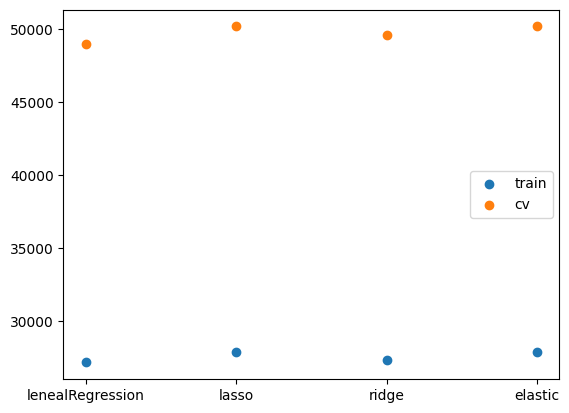

In [26]:
plt.scatter(scores.index, scores['train'], label='train')
plt.scatter(scores.index, scores['cv'], label='cv')
plt.legend()
plt.show()

In [ ]:
# save data to csv
y_pred = elastic.predict(X_test)
pred_df = pd.DataFrame(y_pred, index=data_test.index, columns=['SalePrice'])
pred_df.to_csv('data/elastic_submission.csv')
pred_df.head()

In [32]:
grid_params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 2, 3, 4],
    'alpha': [0.01, 0.1, 1, 10],
    'lambda': [0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(XGBRegressor(), grid_params, cv=5)
grid_search.fit(X_train.values, y_train.values)
best_params = grid_search.best_params_

xgb_model = XGBRegressor(**best_params)
xgb_model.fit(X_train.values, y_train.values)

scores.loc['xgb'] = mean_squared_error(y_train, xgb_model.predict(X_train.values)), mean_squared_error(y_cv, xgb_model.predict(X_cv.values))
scores.head()

,train,cv
lenealRegression,27193.712214,48948.876030
lasso,27933.827969,50169.248290
ridge,27396.047633,49554.595053
elastic,27933.827969,50169.248290
neural,138087.598462,140265.609531


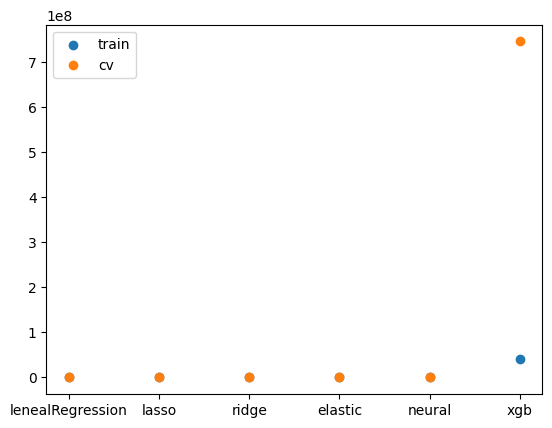

In [33]:
# graph of scores
plt.scatter(scores.index, scores['train'], label='train')
plt.scatter(scores.index, scores['cv'], label='cv')
plt.legend()
plt.show()

In [ ]:
y_pred = xgb_model.predict(X_test.values)

pred_df = pd.DataFrame(y_pred, index=data_test.index, columns=['SalePrice'])
pred_df.to_csv('data/xgb_submission.csv')

In [30]:
model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.01),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.01),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train.values, y_train.values, epochs=1000, batch_size=50, validation_data=(X_cv.values, y_cv.values))



Epoch 1/1000
24/24 [==============================] - 2s 22ms/step - loss: 39014805504.0000 - mae: 181271.2656 - val_loss: 39125487616.0000 - val_mae: 179499.5938
Epoch 2/1000
24/24 [==============================] - 0s 9ms/step - loss: 39014068224.0000 - mae: 181270.9375 - val_loss: 39118077952.0000 - val_mae: 179481.4219
Epoch 3/1000
24/24 [==============================] - 0s 10ms/step - loss: 39013539840.0000 - mae: 181270.4688 - val_loss: 39112028160.0000 - val_mae: 179466.0625
Epoch 4/1000
24/24 [==============================] - 0s 9ms/step - loss: 39012990976.0000 - mae: 181269.9062 - val_loss: 39109271552.0000 - val_mae: 179458.6875
Epoch 5/1000
24/24 [==============================] - 0s 10ms/step - loss: 39012388864.0000 - mae: 181269.2031 - val_loss: 39106637824.0000 - val_mae: 179450.8281
Epoch 6/1000
24/24 [==============================] - 0s 9ms/step - loss: 39011663872.0000 - mae: 181268.3906 - val_loss: 39105384448.0000 - val_mae: 179446.7344
Epoch 7/1000
24/24 [=====

10/10 [==============================] - 0s 2ms/step


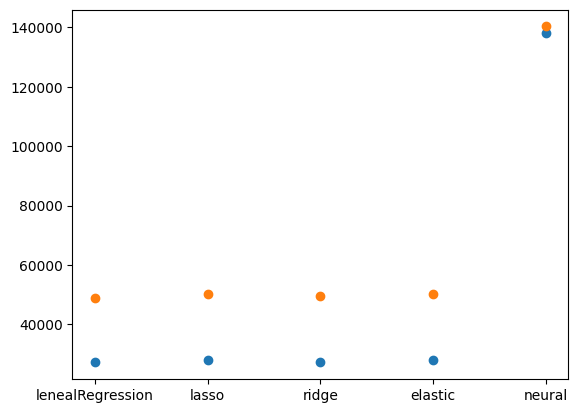

In [29]:
scores.loc['neural'] = mean_squared_error(y_train, model.predict(X_train.values), squared=False), mean_squared_error(y_cv, model.predict(X_cv.values), squared=False)

plt.scatter(scores.index, scores['train'], label='train')
plt.scatter(scores.index, scores['cv'], label='cv')